In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [15]:

datasets = pd.read_csv('Datasets/healthcare-dataset-stroke-data.csv')

datasets.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:

ds = datasets.copy()
ds = ds.dropna()


In [51]:
ds['bmi']

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64

In [52]:


encode = ['gender','ever_married','work_type','Residence_type','smoking_status']
ds=pd.get_dummies(ds,columns=encode)

# copy = df_2.pop('Churn')
# df_2.insert(72,'Churn',copy)
# df_2.head()
ds.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [53]:

X = ds.iloc[:, :-1].values
Y = ds.iloc[:, -1].values


In [54]:
pd.DataFrame(Y)

,0
0,0
1,0
2,1
3,0
4,0
...,...
4904,0
4905,0
4906,0
4907,0


In [55]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.10, random_state = 42)


'id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],

In [56]:

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [57]:
X_Train

array([[ 0.00428524, -0.35006364, -0.31940641, ..., -0.65310169,
        -0.45218481,  1.27356133],
       [-1.6529297 ,  1.56098574, -0.31940641, ..., -0.65310169,
         2.21148517, -0.78519972],
       [ 1.22906924, -1.46113886, -0.31940641, ...,  1.53115513,
        -0.45218481, -0.78519972],
       ...,
       [ 1.30052928,  0.44991052, -0.31940641, ..., -0.65310169,
         2.21148517, -0.78519972],
       [-1.39087779, -1.41669585, -0.31940641, ...,  1.53115513,
        -0.45218481, -0.78519972],
       [ 1.46099257,  0.89434061, -0.31940641, ..., -0.65310169,
         2.21148517, -0.78519972]])

In [58]:
Y_Train

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [61]:

# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42)
classifier.fit(X_Train,Y_Train)


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

In [73]:

# Predicting the test set results
Y_TrainPred = classifier.predict(X_Train)
Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)


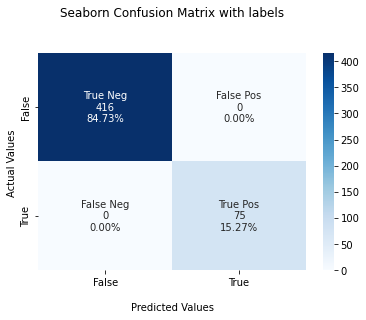

In [69]:

import seaborn as sns


group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [70]:

from sklearn.metrics import accuracy_score


In [74]:
accuracy_score(Y_Train, Y_TrainPred)

1.0

In [75]:
accuracy_score(Y_Test,Y_Pred)

1.0

Text(0.5, 0, 'Feature Importance')

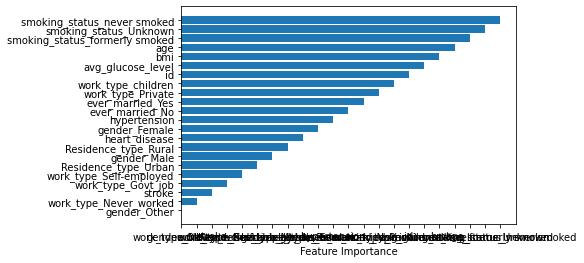

In [78]:

from sklearn.inspection import permutation_importance
sort = classifier.feature_importances_.argsort()
plt.barh(ds.columns[sort],ds.columns[sort])
plt.xlabel("Feature Importance")
